In [170]:
import pandas as pd
import numpy as np
import os
import sklearn
import warnings
from sklearn.metrics import accuracy_score
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

#####READS THE MONTHLY SALES DATA CSV FILE
sales = pd.read_csv('monthly-sales-data.csv')

#####SET MONTH AS INDEX FOR DECOMPOSITION AND SPLIT SALES DATA INTO 3 REGION SPECIFIC DATASETS
emea_sales_actuals = sales.loc[sales['region'] == 'EMEA'].set_index('month')
america_sales_actuals = sales.loc[sales['region'] == 'AMERICA'].set_index('month')
asia_sales_actuals = sales.loc[sales['region'] == 'ASIA'].set_index('month')

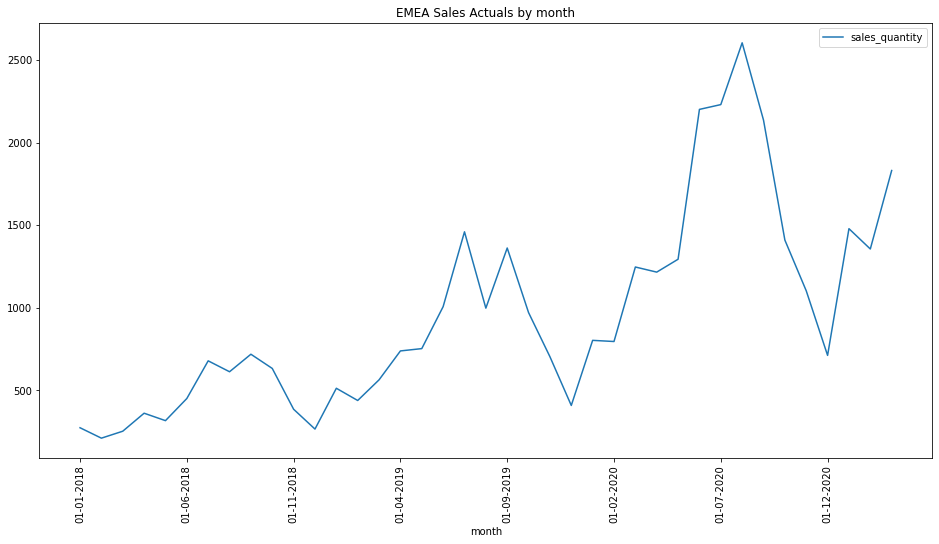

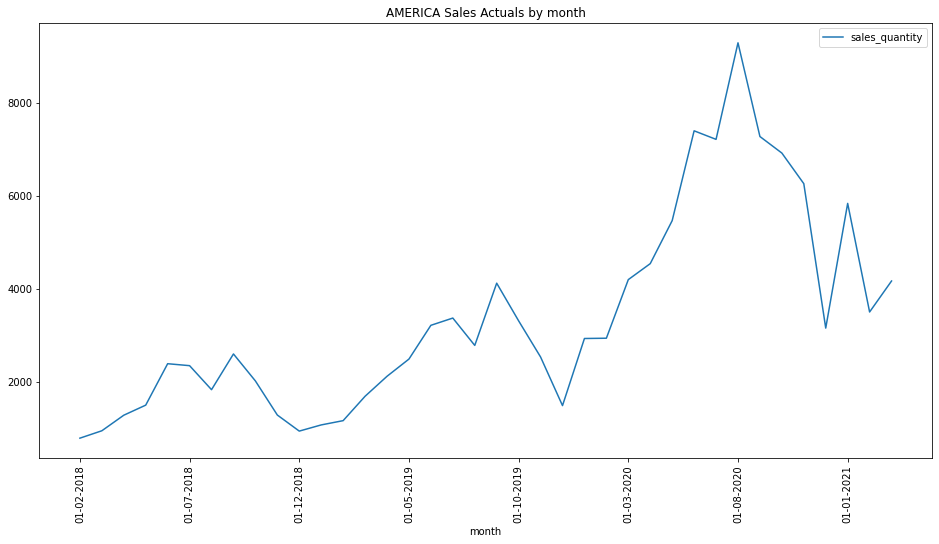

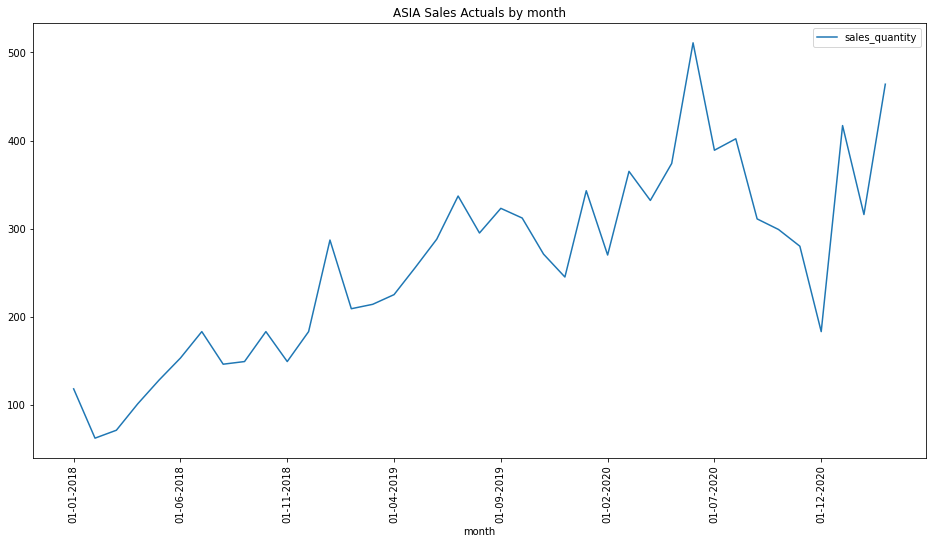

In [171]:
#####PLOT THE TIME SERIES OF SALES DATA
emea_sales_actuals.plot(figsize=(16, 8), title='EMEA Sales Actuals by month')
plt.xticks(rotation=90)
plt.legend()
plt.show()

america_sales_actuals.plot(figsize=(16, 8), title = 'AMERICA Sales Actuals by month')
plt.xticks(rotation=90)
plt.show()

asia_sales_actuals.plot(figsize=(16, 8), title = 'ASIA Sales Actuals by month')
plt.xticks(rotation=90)
plt.show()

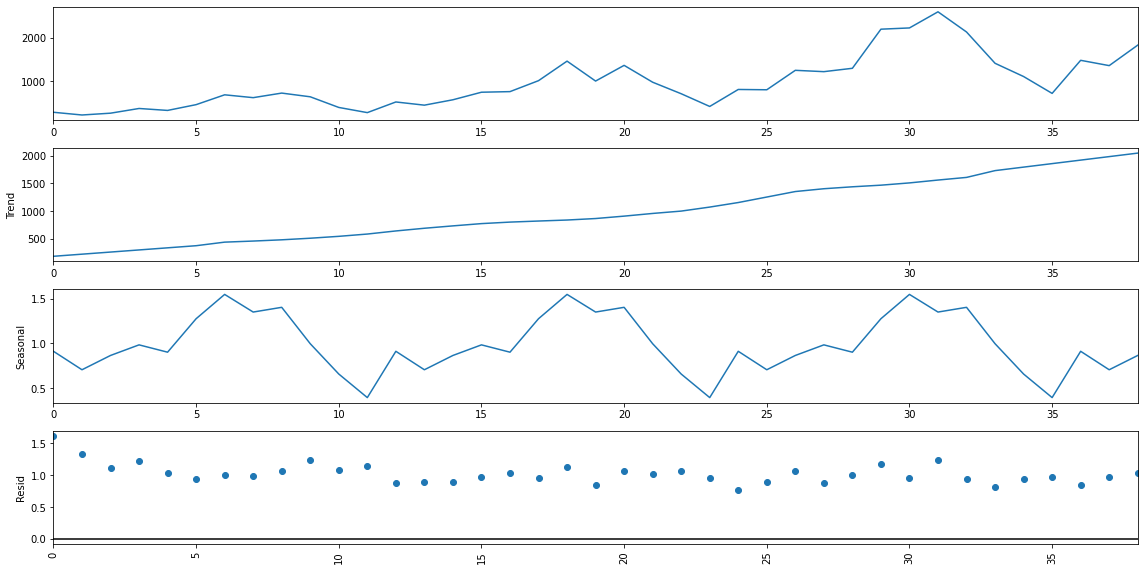

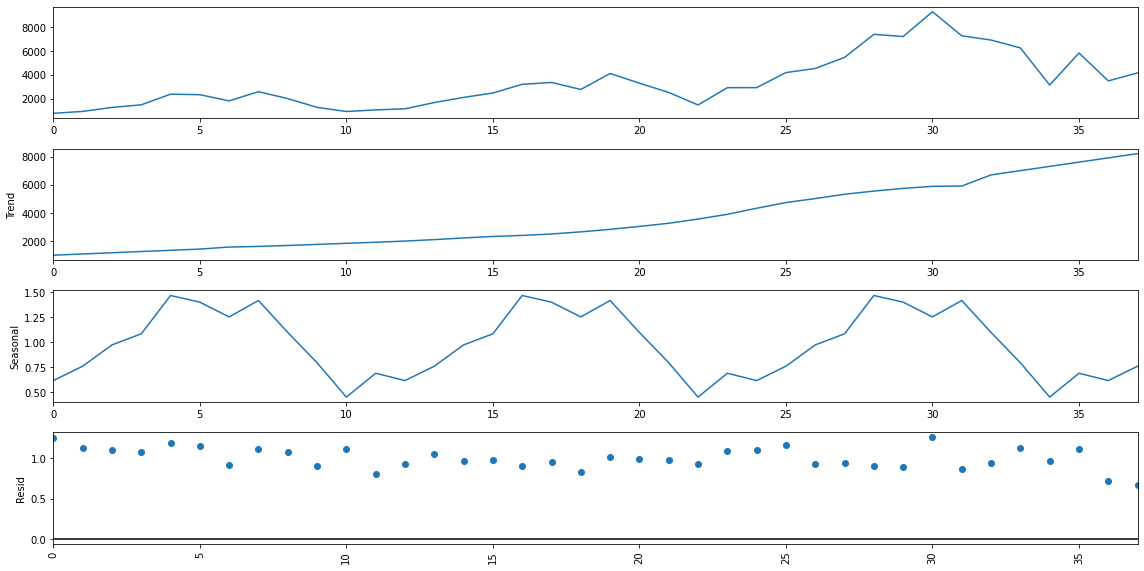

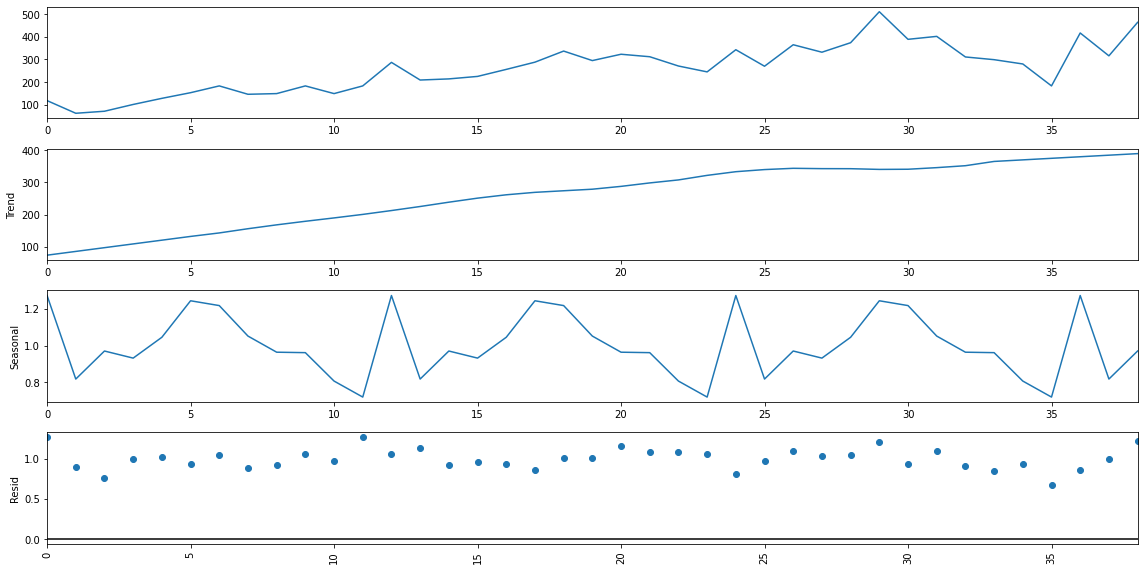

In [172]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8

#####STORE SALES VALUES INTO NEW SERIES FOR DECOMPOSITION

emea_sales = (emea_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])
america_sales = (america_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])
asia_sales = (asia_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])


EMEA_decomposition = sm.tsa.seasonal_decompose(emea_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = EMEA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()


AMERICA_decomposition = sm.tsa.seasonal_decompose(america_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = AMERICA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()

ASIA_decomposition = sm.tsa.seasonal_decompose(asia_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = ASIA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()



In [173]:
import itertools

#####CRATING PARAMETERS LIST FOR THE SARIMAX MODEL
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [174]:
#Selecting the model using the Akaike information criteria (AIC),
#below it runs running the model for each variant. The model with lowest AIC value will be selected.
#Used option enforce_invertibility=False, which allows the moving average polynomial to be non-invertible, so that more of the models are estimable.

#print('START OF EMEA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(emea_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('EMEA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue
#
#
#print('START OF AMERICA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(america_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('AMERICA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue
#
#
#print('START OF ASIA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(asia_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('ASIA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [175]:
#####ONCE THE CORRECT VALUE FOR THE p,d,q PARAMETERS ARE IDENTIFIED, WE CAN START RUNNING THE PREDICTIVE MODEL
##EMEA - 1,1,0 - 0,2,1,12
mod = sm.tsa.statespace.SARIMAX(emea_sales,
                                order=(1,1,0),
                                seasonal_order=(0,2,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
EMEA_SARIMAX_results = mod.fit()
print(EMEA_SARIMAX_results.summary().tables[1])

#AMERICA - 1,1,0 - 1,1,1,12
mod = sm.tsa.statespace.SARIMAX(america_sales,
                                order=(1,1,0),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
AMERICA_SARIMAX_results = mod.fit()
print(AMERICA_SARIMAX_results.summary().tables[1])

#ASIA T 1,1,0 - 0,1,0, 12
mod = sm.tsa.statespace.SARIMAX(asia_sales,
                                order=(1,1,0),
                                seasonal_order=(0,1,0,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
ASIA_SARIMAX_results = mod.fit()
print(ASIA_SARIMAX_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6676      0.148     -4.510      0.000      -0.958      -0.377
ma.S.L12      -0.9946      0.404     -2.461      0.014      -1.787      -0.202
sigma2      7.575e+04   5.34e-06   1.42e+10      0.000    7.58e+04    7.58e+04
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4848      0.139     -3.486      0.000      -0.757      -0.212
ar.S.L12       0.7939      0.711      1.116      0.264      -0.600       2.188
ma.S.L12      -0.9838      0.500     -1.967      0.049      -1.964      -0.004
sigma2      1.006e+06    6.9e-07   1.46e+12      0.000    1.01e+06    1.01e+06
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [176]:
#####HERE WE PRINT THE DIAGNOSTICS OF THE MODELS
#EMEA_Diagnostics = EMEA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
#plt.show()

#AMERICA_Diagnostics = AMERICA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
#plt.show()
#
#ASIA_Diagnostics = ASIA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
#plt.show()

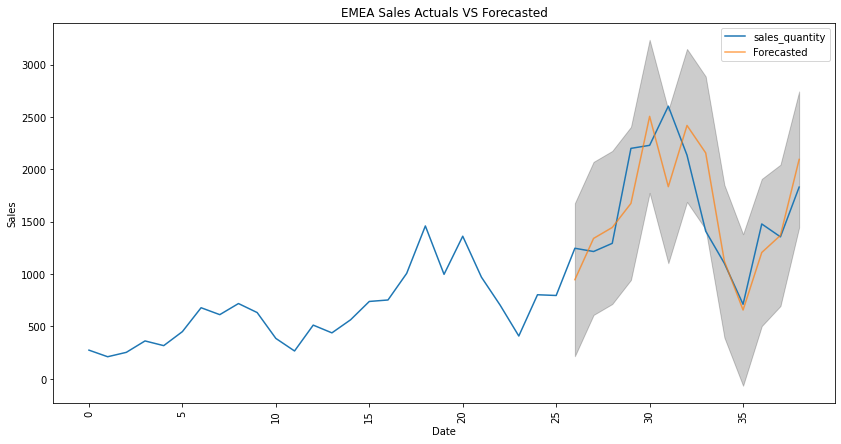

In [177]:
#####WE START BACKTESTING PREDICTION OF  THE EMEA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%

EMEA_pred =[]
EMEA_pred = EMEA_SARIMAX_results.get_prediction(start=(emea_sales).index[26], dynamic=False)

EMEA_pred_ci = EMEA_pred.conf_int()
ax = emea_sales.plot(label='Observed', title='EMEA Sales Actuals VS Forecasted')
EMEA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(EMEA_pred_ci.index,
                EMEA_pred_ci.iloc[:, 0],
                EMEA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('EMEA_Sales_SARIMAX.png')



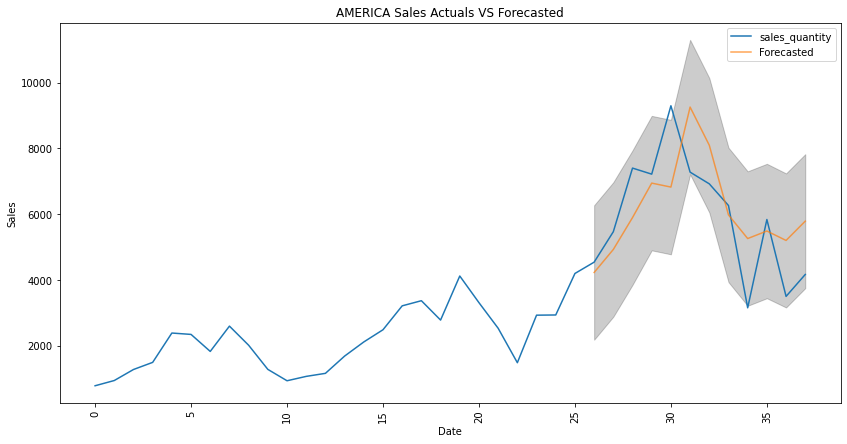

In [178]:
#####WE START BACKTESTING PREDICTION OF  THE AMERICA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%

AMERICA_pred =[]
AMERICA_pred = AMERICA_SARIMAX_results.get_prediction(start=america_sales.index[26], dynamic=False)

AMERICA_pred_ci = AMERICA_pred.conf_int()
ax = america_sales.plot(label='Observed', title='AMERICA Sales Actuals VS Forecasted')
AMERICA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(AMERICA_pred_ci.index,
                AMERICA_pred_ci.iloc[:, 0],
                AMERICA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('AMERICA_Sales_SARIMAX.png')

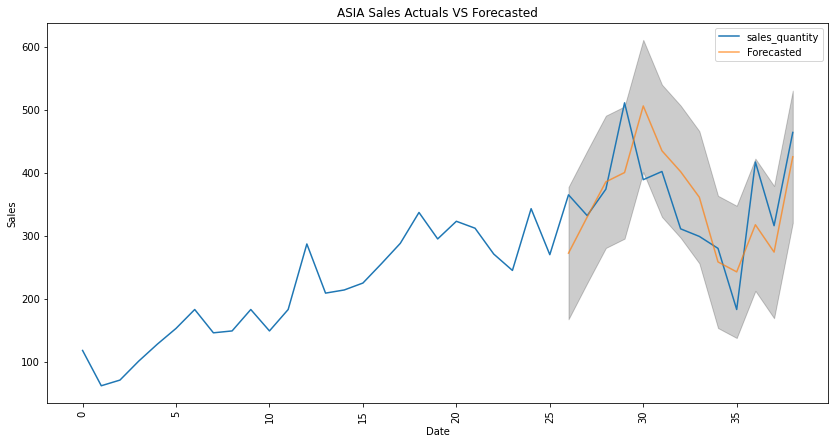

In [179]:


#####WE START BACKTESTING PREDICTION OF  THE ASIA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%
ASIA_pred =[]
ASIA_pred = ASIA_SARIMAX_results.get_prediction(start=asia_sales.index[26], dynamic=False)

ASIA_pred_ci = ASIA_pred.conf_int()
ax = asia_sales.plot(label='Observed', title='ASIA Sales Actuals VS Forecasted')
ASIA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(ASIA_pred_ci.index,
                ASIA_pred_ci.iloc[:, 0],
                ASIA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('ASIA_Sales_SARIMAX.png')

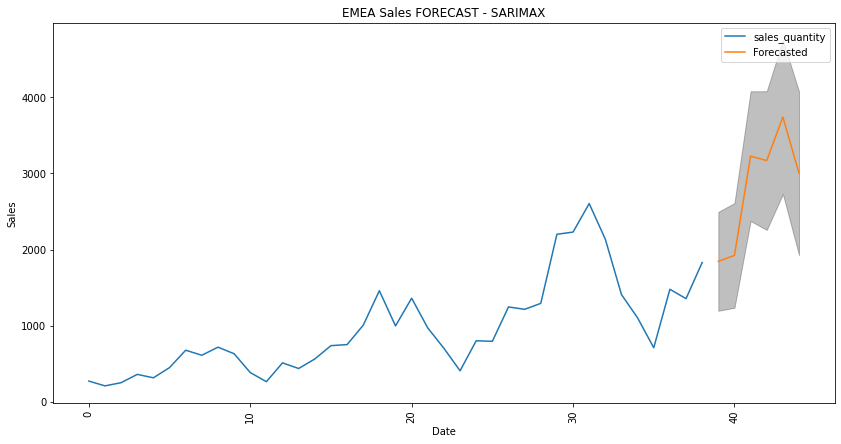

<Figure size 1152x576 with 0 Axes>

In [180]:
#####FORECAST OF NEXT 6 Months EMEA Sales (steps=6)
EMEA_pred_uc = EMEA_SARIMAX_results.get_forecast(steps=6)
EMEA_pred_ci = EMEA_pred_uc.conf_int()
ax = emea_sales.plot(title='EMEA Sales FORECAST - SARIMAX',  label='Observed', figsize=(14, 7))
EMEA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(EMEA_pred_ci.index,
                EMEA_pred_ci.iloc[:, 0],
                EMEA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()
#saving the prediction as a png file
plt.savefig('EMEA_FORECAST_SARIMAX.png')


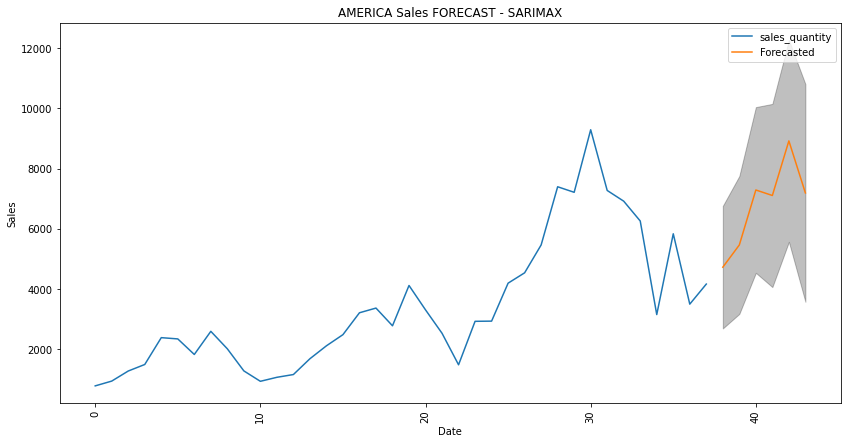

In [181]:
#####FORECAST OF NEXT 6 Months AMERICA Sales (steps=6)
AMERICA_pred_uc = AMERICA_SARIMAX_results.get_forecast(steps=6)
AMERICA_pred_ci = AMERICA_pred_uc.conf_int()
ax = america_sales.plot(title='AMERICA Sales FORECAST - SARIMAX', label='Observed', figsize=(14, 7))
AMERICA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(AMERICA_pred_ci.index,
                AMERICA_pred_ci.iloc[:, 0],
                AMERICA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
#saving the prediction as a png file
plt.savefig('AMERICA_FORECAST_SARIMAX.png')

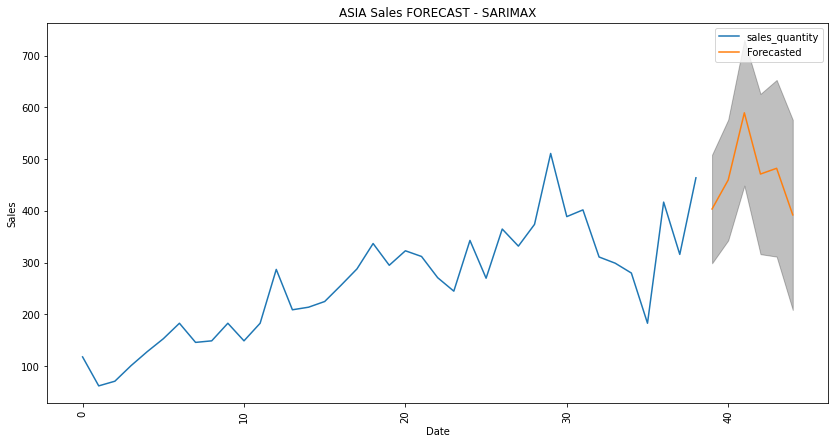

<Figure size 1152x576 with 0 Axes>

In [182]:
#####FORECAST OF NEXT 6 Months ASIA Sales (steps=6)
ASIA_pred_uc = ASIA_SARIMAX_results.get_forecast(steps=6)
ASIA_pred_ci = ASIA_pred_uc.conf_int()
ax = asia_sales.plot(title='ASIA Sales FORECAST - SARIMAX', label='Observed', figsize=(14, 7))
ASIA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(ASIA_pred_ci.index,
                ASIA_pred_ci.iloc[:, 0],
                ASIA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()
#saving the prediction as a png file
plt.savefig('ASIA_FORECAST_SARIMAX.png')

In [183]:
#####CONSOLIDATING ALL THE PREDICTIONS AND THE PREDICTION INTERVALS
print('EMEA PREDICTION AND EMEA PREDICTION INTERVALS IN ABS')

EMEA_CI = EMEA_pred_uc.conf_int(alpha=0.05)
EMEA_PRED = EMEA_pred_uc.predicted_mean
EMEA_Full_Prediction = pd.concat([EMEA_PRED, EMEA_CI], axis=1, join='inner')
print(EMEA_Full_Prediction)

print('AMERICA PREDICTION AND AMERICA PREDICTION INTERVALS IN ABS')

AMERICA_CI = AMERICA_pred_uc.conf_int(alpha=0.05)
AMERICA_PRED = AMERICA_pred_uc.predicted_mean
AMERICA_Full_Prediction = pd.concat([AMERICA_PRED, AMERICA_CI], axis=1, join='inner')
print(AMERICA_Full_Prediction)

print('ASIA PREDICTION AND ASIA PREDICTION INTERVALS IN ABS')

ASIA_CI = ASIA_pred_uc.conf_int(alpha=0.05)
ASIA_PRED = ASIA_pred_uc.predicted_mean
ASIA_Full_Prediction = pd.concat([ASIA_PRED, ASIA_CI], axis=1, join='inner')
print(ASIA_Full_Prediction)


EMEA PREDICTION AND EMEA PREDICTION INTERVALS IN ABS
    predicted_mean  lower sales_quantity  upper sales_quantity
39     1846.061946           1196.814153           2495.309739
40     1923.299148           1235.717118           2610.881179
41     3226.276365           2374.394977           4078.157753
42     3168.631955           2258.110770           4079.153139
43     3740.218309           2728.636885           4751.799734
44     3001.731339           1927.267851           4076.194827
AMERICA PREDICTION AND AMERICA PREDICTION INTERVALS IN ABS
    predicted_mean  lower sales_quantity  upper sales_quantity
38     4725.194142           2688.752532           6761.635752
39     5463.802045           3172.259333           7755.344757
40     7291.023661           4536.602837          10045.444485
41     7108.027807           4063.584725          10152.470889
42     8923.019275           5568.319888          12277.718661
43     7193.024294           3575.139259          10810.909328
ASIA P

In [184]:
#####GETTING ONLY THE PREDICTED VALUES - STORING THEM INTO A DATAFRAME FOR THE JOIN WITH THE ACTUALS
EMEA_Testing = pd.DataFrame(EMEA_pred.predicted_mean)
print(EMEA_Testing)

AMERICA_Testing = pd.DataFrame(AMERICA_pred.predicted_mean)
print(AMERICA_Testing)

ASIA_Testing = pd.DataFrame(ASIA_pred.predicted_mean)
print(ASIA_Testing)

    predicted_mean
26      946.886878
27     1340.962688
28     1445.510845
29     1675.307433
30     2506.715438
31     1835.080118
32     2419.849414
33     2157.583335
34     1122.963774
35      657.361107
36     1206.522060
37     1370.131272
38     2095.341721
    predicted_mean
26     4223.896975
27     4924.155027
28     5893.320032
29     6941.547312
30     6820.974070
31     9253.578218
32     8092.212909
33     5974.477368
34     5255.593248
35     5485.037457
36     5198.371534
37     5784.784161
    predicted_mean
26      272.429558
27      329.732039
28      385.619892
29      400.345027
30      506.020713
31      434.909125
32      401.725135
33      361.176526
34      258.514088
35      242.690054
36      317.500280
37      274.083971
38      425.394477


In [185]:
#####EMEA FINAL DATAFRAME

EMEA_Actuals = emea_sales_actuals.reset_index()

print('EMEA FINAL TABLE BACKTESTING')

EMEA_final = pd.concat([EMEA_Actuals, EMEA_Testing], axis=1, join="outer")
EMEA_final = EMEA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
EMEA_final['error'] = EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']
#Calculating  the abs error
EMEA_final['abs_error'] = (EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']).abs()
#Calculating the squared error
EMEA_final['squared_error'] = (EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']).pow(2)
#Calculating the percentage error
EMEA_final['perc_error'] = ((EMEA_final['error']/EMEA_final['sales_actuals'])*100)
#Calculating the abs percentage error
EMEA_final['abs_perc_error'] = ((EMEA_final['error']/EMEA_final['sales_actuals'])*100).abs()

print(EMEA_final)

#print EMEA mean squared error
EMEA_mse = EMEA_final['squared_error'].sum()/EMEA_final['squared_error'].count()
print('EMEA MSE: {} '.format(EMEA_mse))

#print EMEA root mean squared error
EMEA_rmse = np.sqrt(EMEA_mse.astype(np.float64))
print('EMEA RMSE: {} '.format(EMEA_rmse))

#print EMEA mean absolute error
EMEA_mae = EMEA_final['abs_error'].sum()/EMEA_final['abs_error'].count()
print('EMEA MAE: {} '.format(EMEA_mae))

#print EMEA mean absolute percentage error
EMEA_mape = EMEA_final['abs_perc_error'].sum()/EMEA_final['abs_perc_error'].count()
print('EMEA MAPE: {} '.format(EMEA_mape))

EMEA FINAL TABLE BACKTESTING
         month region  sales_actuals  sales_forecasted       error  \
0   01-01-2018   EMEA            274               NaN         NaN   
1   01-02-2018   EMEA            211               NaN         NaN   
2   01-03-2018   EMEA            253               NaN         NaN   
3   01-04-2018   EMEA            362               NaN         NaN   
4   01-05-2018   EMEA            317               NaN         NaN   
5   01-06-2018   EMEA            451               NaN         NaN   
6   01-07-2018   EMEA            679               NaN         NaN   
7   01-08-2018   EMEA            613               NaN         NaN   
8   01-09-2018   EMEA            719               NaN         NaN   
9   01-10-2018   EMEA            633               NaN         NaN   
10  01-11-2018   EMEA            386               NaN         NaN   
11  01-12-2018   EMEA            266               NaN         NaN   
12  01-01-2019   EMEA            513               NaN       

In [186]:
#####AMERICA FINAL DATAFRAME

AMERICA_Actuals = america_sales_actuals.reset_index()

print('AMERICA FINAL TABLE BACKTESTING')

AMERICA_final = pd.concat([AMERICA_Actuals, AMERICA_Testing], axis=1, join="outer")
#NAM_final = NAM_final.drop(['month'], axis =1)
AMERICA_final = AMERICA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
AMERICA_final['error'] = AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']
#Calculating  the abs error
AMERICA_final['abs_error'] = (AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']).abs()
#Calculating the squared error
AMERICA_final['squared_error'] = (AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']).pow(2)
#Calculating the percentage error
AMERICA_final['perc_error'] = ((AMERICA_final['error']/AMERICA_final['sales_actuals'])*100)
#Calculating the abs percentage error
AMERICA_final['abs_perc_error'] = ((AMERICA_final['error']/AMERICA_final['sales_actuals'])*100).abs()

print(AMERICA_final)

#print mean squared error
AMERICA_mse = AMERICA_final['squared_error'].sum()/AMERICA_final['squared_error'].count()
print('AMERICA MSE: {} '.format(AMERICA_mse))
#print root mean squared error
AMERICA_rmse = np.sqrt(AMERICA_mse.astype(np.float64))
print('AMERICA RMSE: {} '.format(AMERICA_rmse))
#print mean absolute error
AMERICA_mae = AMERICA_final['abs_error'].sum()/AMERICA_final['abs_error'].count()
print('AMERICA MAE: {} '.format(AMERICA_mae))
#print mean absolute percentage error
AMERICA_mape = AMERICA_final['abs_perc_error'].sum()/AMERICA_final['abs_perc_error'].count()
print('AMERICA MAPE: {} '.format(AMERICA_mape))

AMERICA FINAL TABLE BACKTESTING
         month   region  sales_actuals  sales_forecasted        error  \
0   01-02-2018  AMERICA            780               NaN          NaN   
1   01-03-2018  AMERICA            939               NaN          NaN   
2   01-04-2018  AMERICA           1274               NaN          NaN   
3   01-05-2018  AMERICA           1491               NaN          NaN   
4   01-06-2018  AMERICA           2383               NaN          NaN   
5   01-07-2018  AMERICA           2341               NaN          NaN   
6   01-08-2018  AMERICA           1824               NaN          NaN   
7   01-09-2018  AMERICA           2593               NaN          NaN   
8   01-10-2018  AMERICA           2012               NaN          NaN   
9   01-11-2018  AMERICA           1278               NaN          NaN   
10  01-12-2018  AMERICA            932               NaN          NaN   
11  01-01-2019  AMERICA           1065               NaN          NaN   
12  01-02-2019  AME

In [187]:
#####ASIA FINAL DATAFRAME


ASIA_Actuals = asia_sales_actuals.reset_index()
print('ASIA FINAL TABLE BACKTESTING')

ASIA_final = pd.concat([ASIA_Actuals, ASIA_Testing], axis=1, join="outer")
#OPST_final = OPST_final.drop(['month'], axis =1)
ASIA_final = ASIA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
ASIA_final['error'] = ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']
#Calculating  the abs error
ASIA_final['abs_error'] = (ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']).abs()
#Calculating the squared error
ASIA_final['squared_error'] = (ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']).pow(2)
#Calculating the percentage error
ASIA_final['perc_error'] = ((ASIA_final['error']/ASIA_final['sales_actuals'])*100)
#Calculating the abs percentage error
ASIA_final['abs_perc_error'] = ((ASIA_final['error']/ASIA_final['sales_actuals'])*100).abs()

print(ASIA_final)

#print mean squared error
ASIA_mse = ASIA_final['squared_error'].sum()/ASIA_final['squared_error'].count()
print('ASIA MSE: {} '.format(ASIA_mse))
#print root mean squared error
ASIA_rmse = np.sqrt(ASIA_mse.astype(np.float64))
print('ASIA RMSE: {} '.format(ASIA_rmse))
#print mean absolute error
ASIA_mae = ASIA_final['abs_error'].sum()/ASIA_final['abs_error'].count()
print('ASIA MAE: {} '.format(ASIA_mae))
#print mean absolute percentage error
ASIA_mape = ASIA_final['abs_perc_error'].sum()/ASIA_final['abs_perc_error'].count()
print('ASIA MAPE: {} '.format(ASIA_mape))


ASIA FINAL TABLE BACKTESTING
         month region  sales_actuals  sales_forecasted       error  \
0   01-01-2018   ASIA            118               NaN         NaN   
1   01-02-2018   ASIA             62               NaN         NaN   
2   01-03-2018   ASIA             71               NaN         NaN   
3   01-04-2018   ASIA            101               NaN         NaN   
4   01-05-2018   ASIA            128               NaN         NaN   
5   01-06-2018   ASIA            153               NaN         NaN   
6   01-07-2018   ASIA            183               NaN         NaN   
7   01-08-2018   ASIA            146               NaN         NaN   
8   01-09-2018   ASIA            149               NaN         NaN   
9   01-10-2018   ASIA            183               NaN         NaN   
10  01-11-2018   ASIA            149               NaN         NaN   
11  01-12-2018   ASIA            183               NaN         NaN   
12  01-01-2019   ASIA            287               NaN       

In [188]:
#####STORE ALL THE FINAL TABLES FOR ALL THE REGIONS INTO A SINGLE EXCEL FILE

EMEA_final_Tb = pd.DataFrame(EMEA_final)
AMERICA_final_Tb = pd.DataFrame(AMERICA_final)
ASIA_final_Tb = pd.DataFrame(ASIA_final)

path = 'STARTS_sarima_all_orgs.xlsx'
with pd.ExcelWriter(path, engine='openpyxl') as writer:
    EMEA_final_Tb.to_excel(writer, 'EMEA_final_Sales_Forecast')
    AMERICA_final_Tb.to_excel(writer, 'AMERICA_final_Sales_Forecats')
    AMERICA_final_Tb.to_excel(writer, 'ASIA_final_Sales_Forecast')